In [1]:
# pip install folium

In [2]:
# pip install geopy

In [3]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns


from geopy.geocoders import Nominatim 
import folium 

## 1. Data Collection

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
# customers dataset
df_customer = pd.read_csv('data/customers_dataset.csv')

# geolocation dataset
df_geolocation = pd.read_csv('data/geolocation_dataset.csv')

# order items dataset
df_order_item = pd.read_csv('data/order_items_dataset.csv')

# order payments dataset
df_order_payment = pd.read_csv('data/order_payments_dataset.csv')

# order reviews dataset
df_order_review = pd.read_csv('data/order_reviews_dataset.csv')

# order dataset
df_order = pd.read_csv('data/orders_dataset.csv')

# products dataset
df_product = pd.read_csv('data/olist_products_dataset.csv')

# sellers dataset
df_seller = pd.read_csv('data/sellers_dataset.csv')

# product category name translation 
df_product_category = pd.read_csv('data/product_category_name_translation.csv')

### 1.1. customers

In [6]:
print(df_customer.shape)
df_customer.head()

(99441, 5)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


### 1.2. order items

In [7]:
print(df_order_item.shape)
df_order_item.head()

(112650, 7)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


### 1.3. order payments

In [8]:
print(df_order_payment.shape)
df_order_payment.head()

(103886, 5)


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


### 1.4. order reviews

In [9]:
print(df_order_review.shape)
df_order_review.head()

(99224, 7)


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


### 1.5. orders

In [10]:
print(df_order.shape)
df_order.head()

(99441, 8)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


### 1.6. products

In [11]:
print(df_product.shape)
df_product.head()

(32951, 9)


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


### 1.7. sellers

In [12]:
print(df_seller.shape)
df_seller.head()

(3095, 4)


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### 1.8. product categories

In [13]:
print(df_product_category.shape)
df_product_category.head()

(71, 2)


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### 1.9. geolocation

In [14]:
print(df_geolocation.shape)
df_geolocation.head()

(1000163, 5)


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


## 2. Data Preparation 

### 2.1. combine datasets

In [15]:
# join order and customer
order_customer = pd.merge(left = df_order, right = df_customer, how = 'left', on = 'customer_id')
# join order and order payment
order_payment = pd.merge(left = order_customer, right = df_order_payment, how = 'left', on = 'order_id')
# join order payment and order reviews
order_review = pd.merge(left = order_payment, right = df_order_review, how = 'left', on = 'order_id')
# join order payment and order items
order_item = pd.merge(left = order_review, right = df_order_item, how = 'left', on = 'order_id')


# join order items and product
product = pd.merge(left = order_item, right = df_product, how = 'left', on = 'product_id')
product_category = pd.merge(left = product, right = df_product_category, how = 'left', on = 'product_category_name')


# join order items and sellers
seller = pd.merge(left = product_category, right = df_seller, how = 'left', on = 'seller_id')
seller.shape

(119143, 40)

In [16]:
df_final = seller.copy()

In [17]:
df_final.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'seller_zip_code_prefix',
       'seller_city', 'seller_state'],
      dtype='object')

### 2.2. convert datatypes

In [18]:
df_final.dtypes

order_id                          object
customer_id                       object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
customer_unique_id                object
customer_zip_code_prefix           int64
customer_city                     object
customer_state                    object
payment_sequential               float64
payment_type                      object
payment_installments             float64
payment_value                    float64
review_id                         object
review_score                     float64
review_comment_title              object
review_comment_message            object
review_creation_date              object
review_answer_timestamp           object
order_item_id                    float64
product_id                        object
seller_id       

In [19]:
df_final['order_purchase_timestamp'] = pd.to_datetime(df_final['order_purchase_timestamp'])
df_final['order_approved_at'] = pd.to_datetime(df_final['order_approved_at'])
df_final['order_delivered_carrier_date'] = pd.to_datetime(df_final['order_delivered_carrier_date'])
df_final['order_delivered_customer_date'] = pd.to_datetime(df_final['order_delivered_customer_date'])
df_final['order_estimated_delivery_date'] = pd.to_datetime(df_final['order_estimated_delivery_date'])
df_final['review_creation_date'] = pd.to_datetime(df_final['review_creation_date'])
df_final['shipping_limit_date'] = pd.to_datetime(df_final['shipping_limit_date'])

### 2.3. Number of Duplicates

In [20]:
# number of duplicates
df_final.duplicated().sum()

0

### 2.4. Number of Nulls

In [21]:
# number of nulls
df_final.isna().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                   177
order_delivered_carrier_date       2086
order_delivered_customer_date      3421
order_estimated_delivery_date         0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
payment_sequential                    3
payment_type                          3
payment_installments                  3
payment_value                         3
review_id                           997
review_score                        997
review_comment_title             105154
review_comment_message            68898
review_creation_date                997
review_answer_timestamp             997
order_item_id                       833
product_id                          833
seller_id                           833


In [22]:
# filing null reveiws with unknown
df_final["review_comment_title"].fillna('unknown', inplace = True) 
df_final["review_comment_message"].fillna('unknown', inplace = True)

# deleting nulls in the rest of the columns because there is sufficient data to do the analysis
df_final = df_final.dropna()

In [23]:
df_final.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
review_id                        0
review_score                     0
review_comment_title             0
review_comment_message           0
review_creation_date             0
review_answer_timestamp          0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_nam

## 3. Exploratory Data Analysis

### 3.1. Product Analysis

In [24]:
df_analysis = df_final[['customer_id','order_purchase_timestamp',
                        'order_delivered_customer_date',
                        'product_category_name_english',
                        'payment_value',
                        'payment_type',
                        'payment_installments',
                        'price',
                        'freight_value',
                        'order_status',
                        'product_id','seller_id', 'customer_city', 'seller_city','review_score']]

In [25]:
df_analysis = df_analysis.drop_duplicates()
df_analysis.duplicated().sum()

0

In [26]:
df_analysis

,customer_id,order_purchase_timestamp,order_delivered_customer_date,product_category_name_english,payment_value,payment_type,payment_installments,price,freight_value,order_status,product_id,seller_id,customer_city,seller_city,review_score
0,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-10 21:25:13,housewares,18.12,credit_card,1.0,29.99,8.72,delivered,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,sao paulo,maua,4.0
1,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-10 21:25:13,housewares,2.00,voucher,1.0,29.99,8.72,delivered,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,sao paulo,maua,4.0
2,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-10 21:25:13,housewares,18.59,voucher,1.0,29.99,8.72,delivered,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,sao paulo,maua,4.0
3,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,2018-08-07 15:27:45,perfumery,141.46,boleto,1.0,118.70,22.76,delivered,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,barreiras,belo horizonte,4.0
4,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,2018-08-17 18:06:29,auto,179.12,credit_card,3.0,159.90,19.22,delivered,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,vianopolis,guariba,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119137,39bd1228ee8140590ac3aca26f2dfe00,2017-03-09 09:54:05,2017-03-17 15:08:01,health_beauty,85.08,credit_card,3.0,72.00,13.08,delivered,ac35486adb7b02598c182c2ff2e05254,e24fc9fcd865784fb25705606fe3dfe7,sao jose dos campos,braganca paulista,5.0
119138,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 12:58:58,2018-02-28 17:37:56,baby,195.00,credit_card,3.0,174.90,20.10,delivered,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,praia grande,tupa,4.0
119139,1aa71eb042121263aafbe80c1b562c9c,2017-08-27 14:46:43,2017-09-21 11:24:17,home_appliances_2,271.01,credit_card,5.0,205.99,65.02,delivered,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,nova vicosa,sao paulo,5.0
119140,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:27,2018-01-25 23:32:54,computers_accessories,441.16,credit_card,4.0,179.99,40.59,delivered,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,japuiba,ilicinea,2.0


In [27]:
df_analysis['customer_id'].nunique()

94471

In [28]:
df_analysis['product_id'].nunique()

31474

In [29]:
df_analysis['hours_to_deliver'] = (df_analysis['order_delivered_customer_date'] - 
                                   df_analysis['order_purchase_timestamp']).astype('timedelta64[h]')

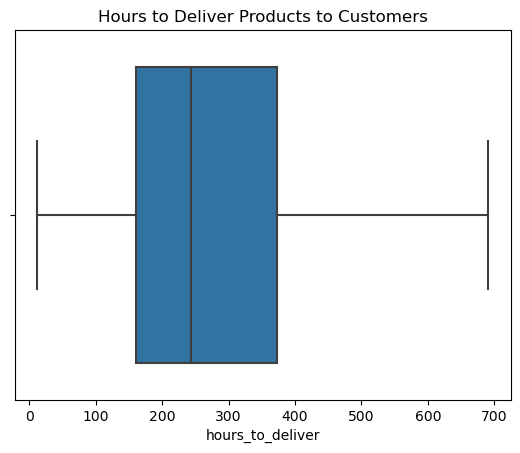

In [30]:
sns.boxplot(x=df_analysis["hours_to_deliver"], showfliers = False)
plt.title('Hours to Deliver Products to Customers');

In [31]:
df_delivery_status = df_analysis[['product_category_name_english','hours_to_deliver']]

In [32]:
df_delivery_status = df_analysis[["product_category_name_english","hours_to_deliver"]]
df_delivery_status = df_delivery_status.groupby(by=["product_category_name_english"]).mean()
df_delivery_status = df_delivery_status.reset_index()
df_delivery_status = df_delivery_status.sort_values(by="hours_to_deliver", ascending=False)
df_delivery_status_10 = df_delivery_status.head(10)

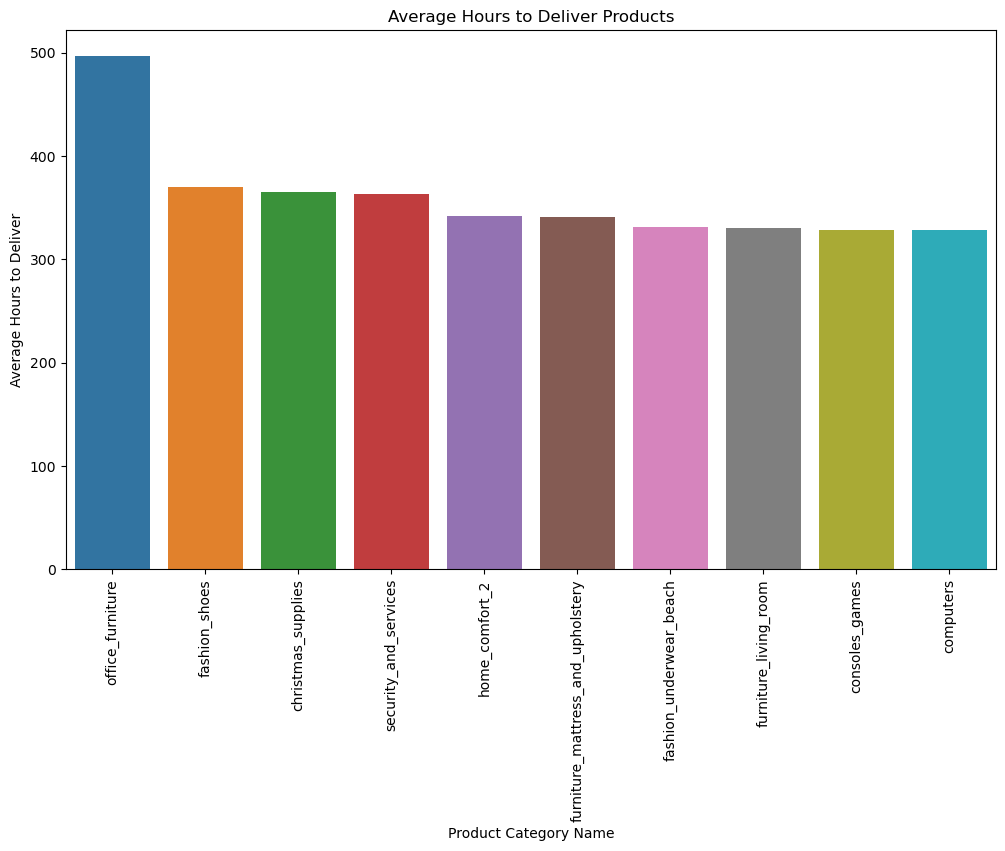

In [33]:
# delivery based on product
plt.figure(figsize=(12,7))
sns.barplot(data=df_delivery_status_10, x="product_category_name_english", 
            y="hours_to_deliver", 
            estimator=np.mean)
plt.xlabel('Product Category Name')
plt.ylabel('Average Hours to Deliver')
plt.title('Average Hours to Deliver Products')
plt.xticks(rotation=90);

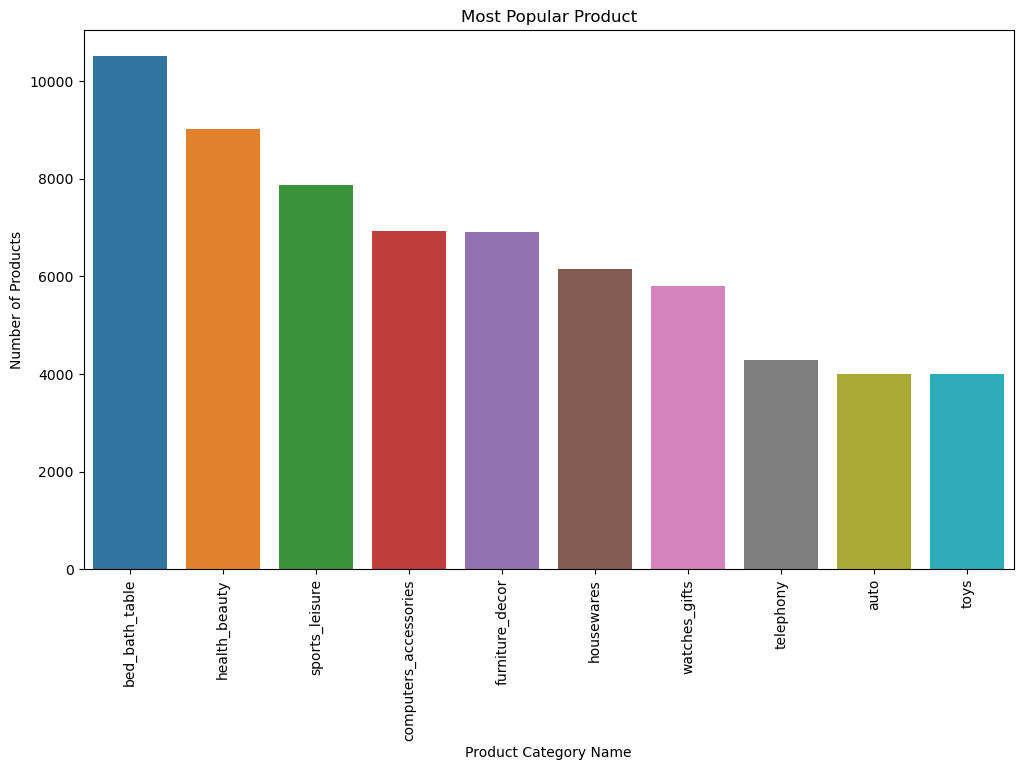

In [34]:
# most popular product
plt.figure(figsize=(12,7))
sns.countplot(data=df_analysis, x="product_category_name_english", 
              order=df_analysis["product_category_name_english"].value_counts().index[0:10])
plt.xlabel('Product Category Name')
plt.ylabel('Number of Products')
plt.title('Most Popular Product')
plt.xticks(rotation=90);
# plt.savefig("figure.png");

In [35]:
df_product_payment = df_analysis[["product_category_name_english","payment_value"]]
df_product_payment = df_product_payment.groupby(by=["product_category_name_english"]).sum()
df_product_payment = df_product_payment.reset_index()
df_product_payment = df_product_payment.sort_values(by='payment_value', ascending=False)
df_product_payment_10 = df_product_payment.head(10)

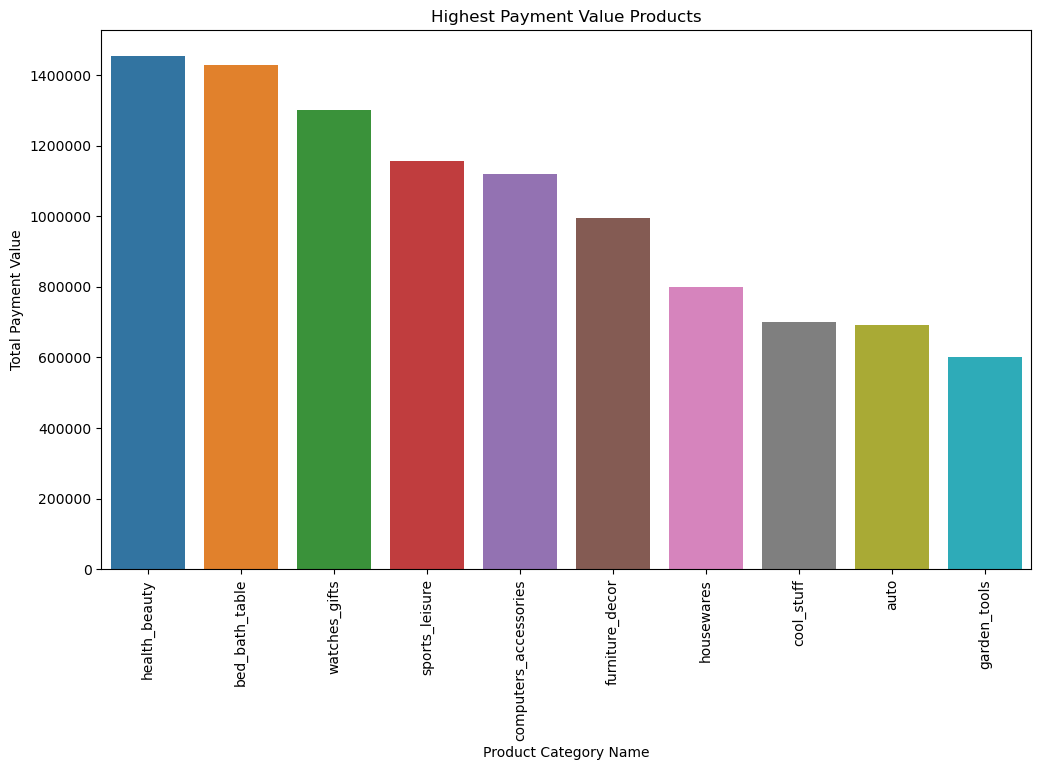

In [36]:
# Product Payment Value
plt.figure(figsize=(12,7))
sns.barplot(data=df_product_payment_10, x="product_category_name_english", y="payment_value", 
            estimator=np.sum, ci = None)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Product Category Name')
plt.ylabel('Total Payment Value')
plt.title('Highest Payment Value Products')
plt.xticks(rotation=90);

In [37]:
df_product_review = df_analysis[["product_category_name_english","review_score"]]
df_product_review = df_product_review.groupby(by=["product_category_name_english"]).sum()
df_product_review = df_product_review.reset_index()
df_product_review = df_product_review.sort_values(by='review_score', ascending=False)
df_product_review_10 = df_product_review.head(10)

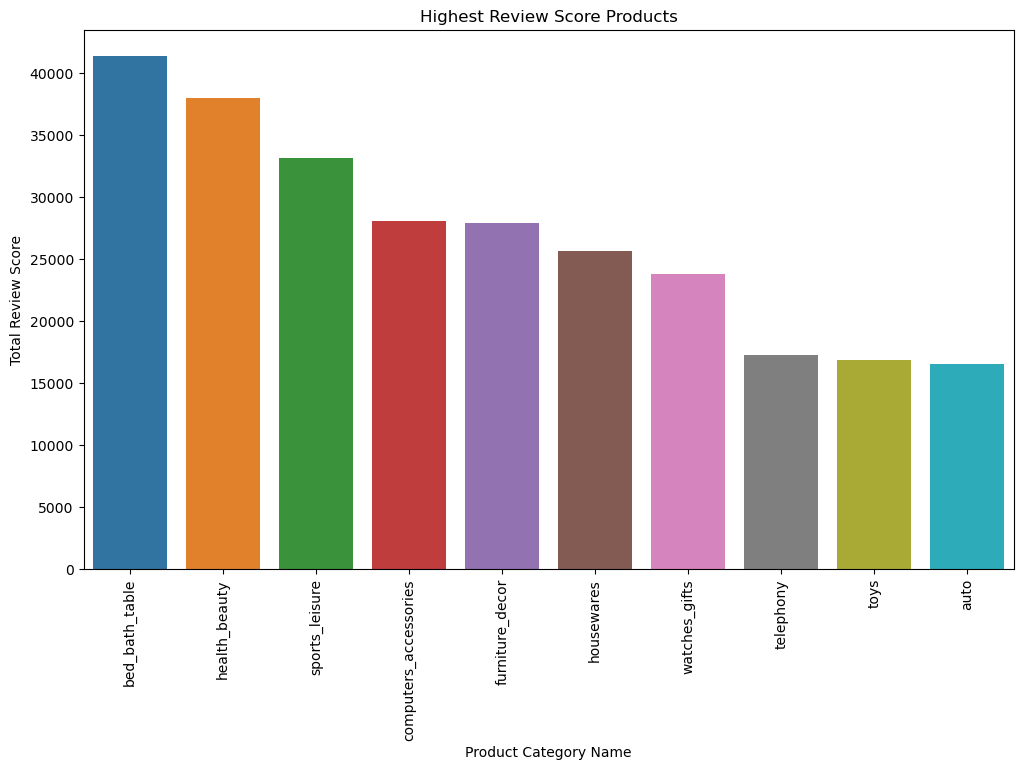

In [38]:
# Product Payment Value
plt.figure(figsize=(12,7))
sns.barplot(data=df_product_review_10, x="product_category_name_english", y="review_score", 
            estimator=np.sum, ci = None)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Product Category Name')
plt.ylabel('Total Review Score')
plt.title('Highest Review Score Products')
plt.xticks(rotation=90);

### 3.2. Payment Analysis

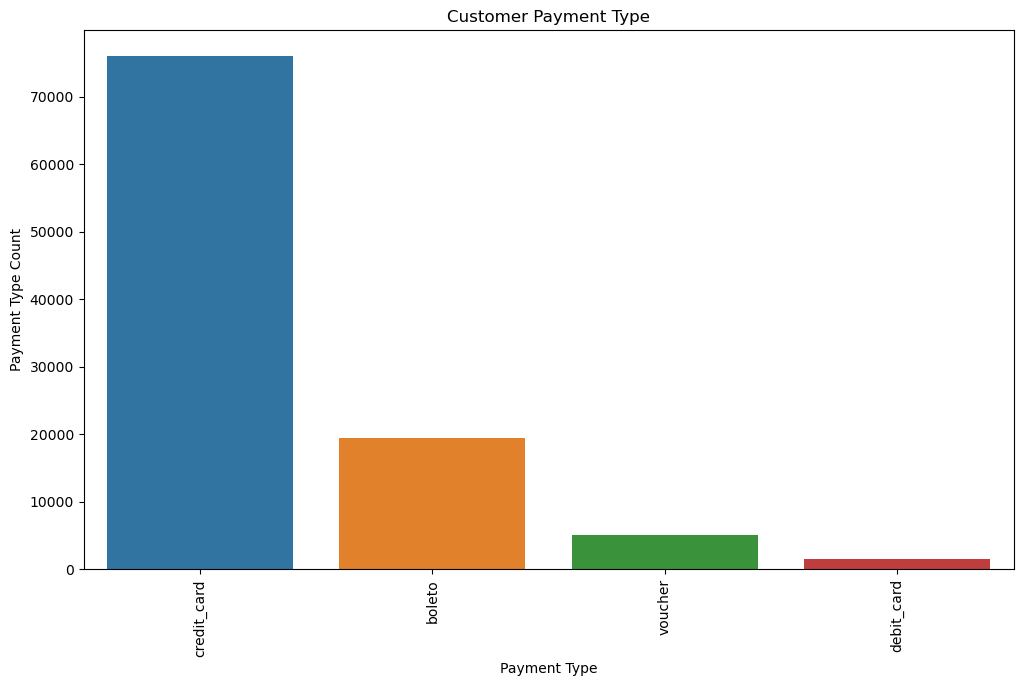

In [39]:
# most popular payment method
plt.figure(figsize=(12,7))
sns.countplot(data=df_analysis, x="payment_type", 
              order=df_analysis["payment_type"].value_counts().index)
plt.xlabel('Payment Type')
plt.ylabel('Payment Type Count')
plt.title('Customer Payment Type')
plt.xticks(rotation=90);
# plt.savefig("figure.png");

In [40]:
df_corr = df_analysis[['payment_value','payment_installments','price','freight_value']]

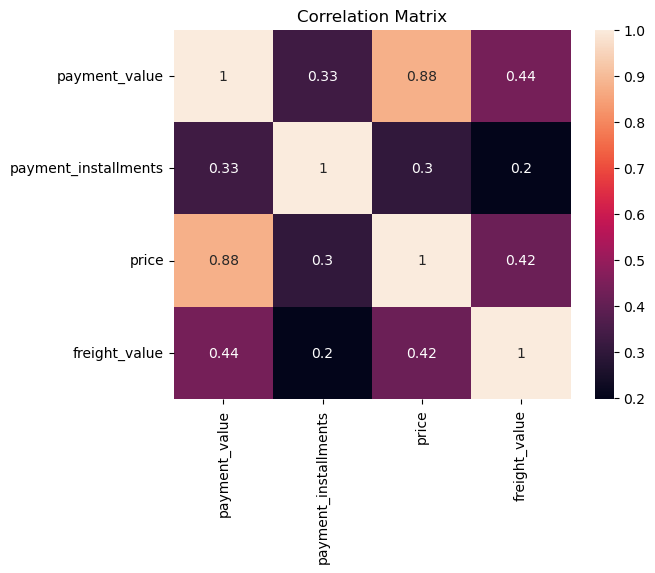

In [41]:
sns.heatmap(df_corr.corr(), annot=True)
plt.title("Correlation Matrix");

In [42]:
df_analysis['month_year'] = pd.to_datetime(df_analysis['order_purchase_timestamp']).dt.to_period('M')
# sns.lineplot(data=df_customer, x="month_year", y="payment_value")

In [43]:
df_analysis['month_year']=df_analysis['month_year'].astype(str)

In [44]:
df_analysis['month_year'] = pd.to_datetime(df_analysis['month_year'])

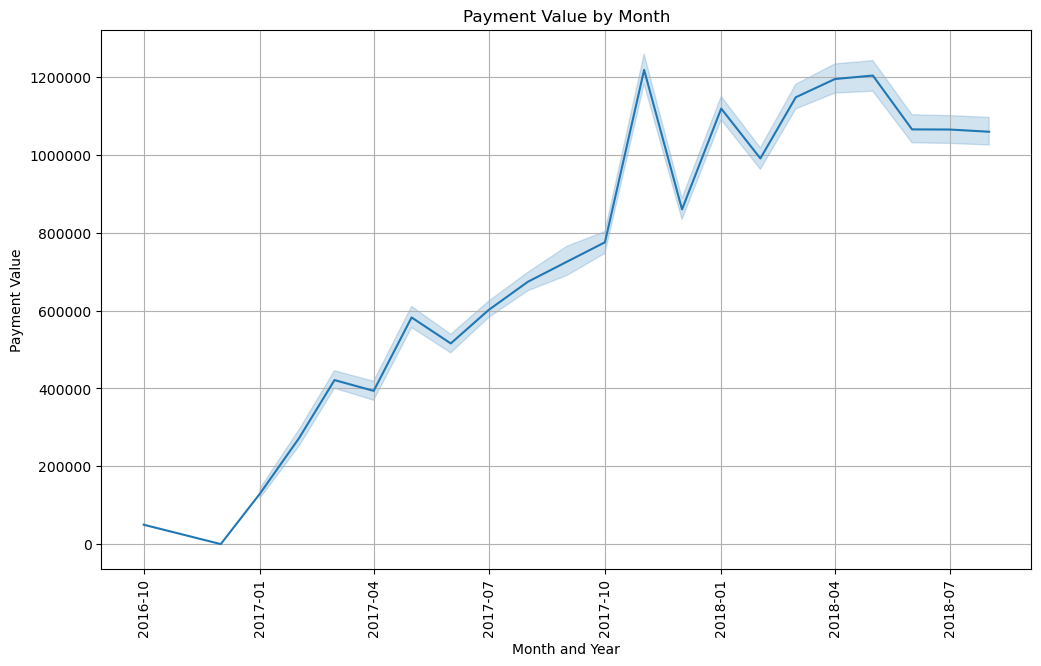

In [45]:
plt.figure(figsize=(12,7))
sns.lineplot(x="month_year", y="payment_value", data=df_analysis, estimator=np.sum, sort=True)
plt.ticklabel_format(style='plain', axis='y')
plt.grid()
plt.title('Payment Value by Month')
plt.xlabel('Month and Year')
plt.ylabel('Payment Value')
plt.xticks(rotation=90);

### 3.3. Customer Behaviour

In [46]:
consumer_count = df_analysis['customer_id'].value_counts()
consumer_count

92cd3ec6e2d643d4ebd0e3d6238f69e2    22
86cc80fef09f7f39df4b0dbce48e81cb    20
23924b2105c5376cd6204757c8b68752    20
b246eeed30b362c09d867b9e598bee51    19
eed931d3a5222a9a511d18be7fd2a5ba    17
                                    ..
32f9ab38c7f8f0a627ee957c50ea0ac2     1
9b75d329d5d07427875e8443ce939770     1
17602b0ca034c6c3142313d06c6beee2     1
309b93ec3ed3ba60315a1454c506ffe6     1
edb027a75a1449115f6b43211ae02a24     1
Name: customer_id, Length: 94471, dtype: int64

In [47]:
more_than_two = df_analysis[df_analysis['customer_id'].isin(consumer_count.index[consumer_count > 2])]
more_than_two_purchases = more_than_two['customer_id'].nunique()
print(more_than_two_purchases)

more_than_five = df_analysis[df_analysis['customer_id'].isin(consumer_count.index[consumer_count > 5])]
more_than_five_purchases = more_than_five['customer_id'].nunique()
print(more_than_five_purchases)

more_than_ten = df_analysis[df_analysis['customer_id'].isin(consumer_count.index[consumer_count > 10])]
more_than_ten_purchases = more_than_ten['customer_id'].nunique()
print(more_than_ten_purchases)

more_than_fifteen  = df_analysis[df_analysis['customer_id'].isin(consumer_count.index[consumer_count > 15])]
more_than_fifteen_purchases = more_than_fifteen['customer_id'].nunique()
print(more_than_fifteen_purchases)

more_than_twenty = df_analysis[df_analysis['customer_id'].isin(consumer_count.index[consumer_count > 20])]
more_than_twenty_purchases = more_than_twenty['customer_id'].nunique()
print(more_than_twenty_purchases)

861
98
21
7
1


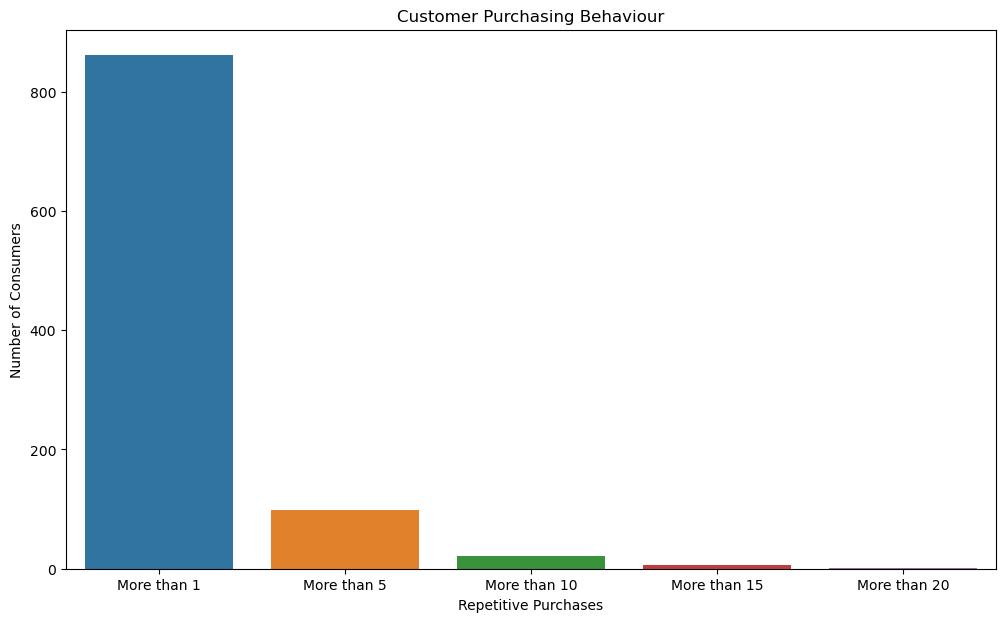

In [48]:
data = [more_than_two_purchases, more_than_five_purchases, more_than_ten_purchases, 
        more_than_fifteen_purchases, more_than_twenty_purchases]
keys = ['More than 1', 'More than 5', 'More than 10', 'More than 15', 'More than 20']

# Product Payment Value
plt.figure(figsize=(12,7))
sns.barplot(x=keys, y=data, estimator=np.sum)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Customer Purchasing Behaviour')
plt.xlabel('Repetitive Purchases')
plt.ylabel('Number of Consumers');
# plt.xticks(rotation=90);

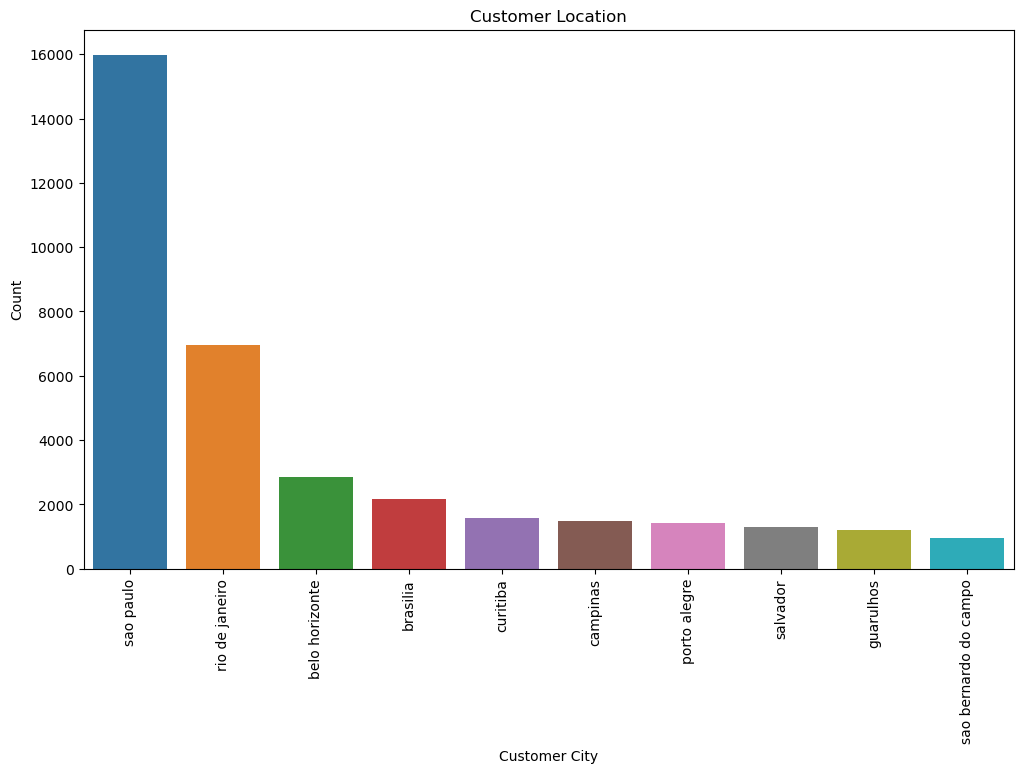

In [49]:
# customer city 
plt.figure(figsize=(12,7))
sns.countplot(data=df_analysis, x="customer_city", 
              order=df_analysis["customer_city"].value_counts().index[0:10])
plt.xlabel('Customer City')
plt.ylabel('Count')
plt.title('Customer Location')
plt.xticks(rotation=90);
# plt.savefig("figure.png");

### 3.4. Seller Behaviour

In [50]:
seller_count = df_analysis['seller_id'].value_counts()
seller_count

6560211a19b47992c3666cc44a7e94c0    2009
4a3ca9315b744ce9f8e9374361493884    1970
cc419e0650a3c5ba77189a1882b7556a    1730
1f50f920176fa81dab994f9023523100    1515
da8622b14eb17ae2831f4ac5b9dab84a    1504
                                    ... 
edb65fe661681b1c0de8bd47c8655855       1
05ca864204d09595ae591b93ea9cf93d       1
aa2640d851ec322526f1295bbeb20092       1
ea1776927851da2532aa70d6a32c095a       1
f3862c2188522d89860c38a3ea8b550d       1
Name: seller_id, Length: 2907, dtype: int64

In [51]:
more_than_1 = df_analysis[df_analysis['seller_id'].isin(seller_count.index[seller_count > 2])]
more_than_1_purchases = more_than_1['seller_id'].nunique()
print(more_than_1_purchases)

more_than_5 = df_analysis[df_analysis['seller_id'].isin(seller_count.index[seller_count > 5])]
more_than_5_purchases = more_than_5['seller_id'].nunique()
print(more_than_5_purchases)

more_than_10 = df_analysis[df_analysis['seller_id'].isin(seller_count.index[seller_count > 10])]
more_than_10_purchases = more_than_10['seller_id'].nunique()
print(more_than_10_purchases)

more_than_15 = df_analysis[df_analysis['seller_id'].isin(seller_count.index[seller_count > 15])]
more_than_15_purchases = more_than_15['seller_id'].nunique()
print(more_than_15_purchases)

more_than_20 = df_analysis[df_analysis['seller_id'].isin(seller_count.index[seller_count > 20])]
more_than_20_purchases = more_than_20['seller_id'].nunique()
print(more_than_20_purchases)

2113
1618
1203
948
805


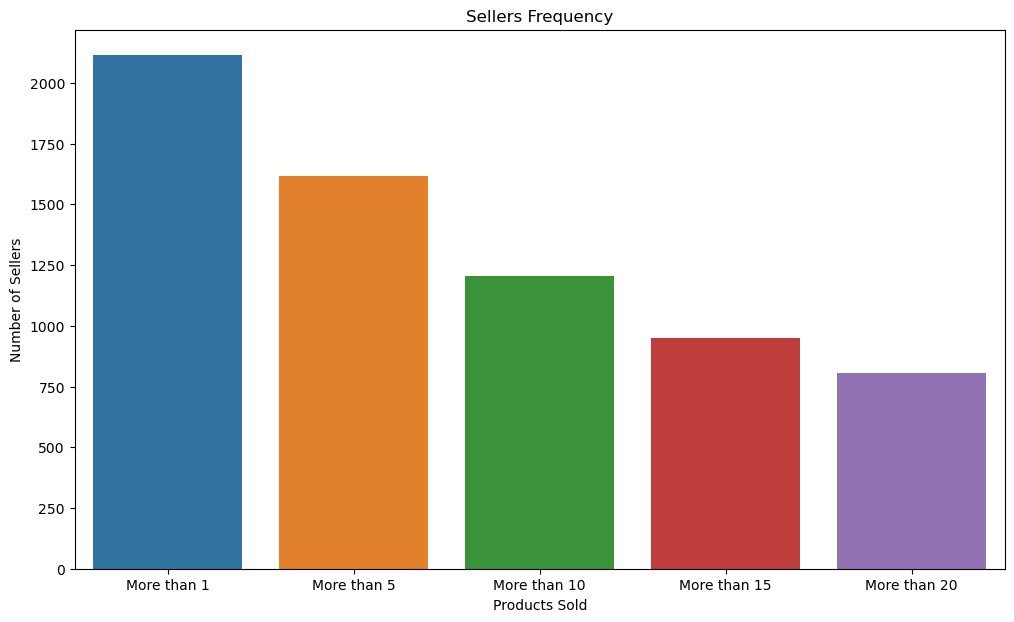

In [52]:
data = [more_than_1_purchases, more_than_5_purchases, more_than_10_purchases, 
        more_than_15_purchases, more_than_20_purchases]
keys = ['More than 1', 'More than 5', 'More than 10', 'More than 15', 'More than 20']

# Product Payment Value
plt.figure(figsize=(12,7))
sns.barplot(x=keys, y=data, estimator=np.sum)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Sellers Frequency')
plt.xlabel('Products Sold')
plt.ylabel('Number of Sellers');
# plt.xticks(rotation=90);

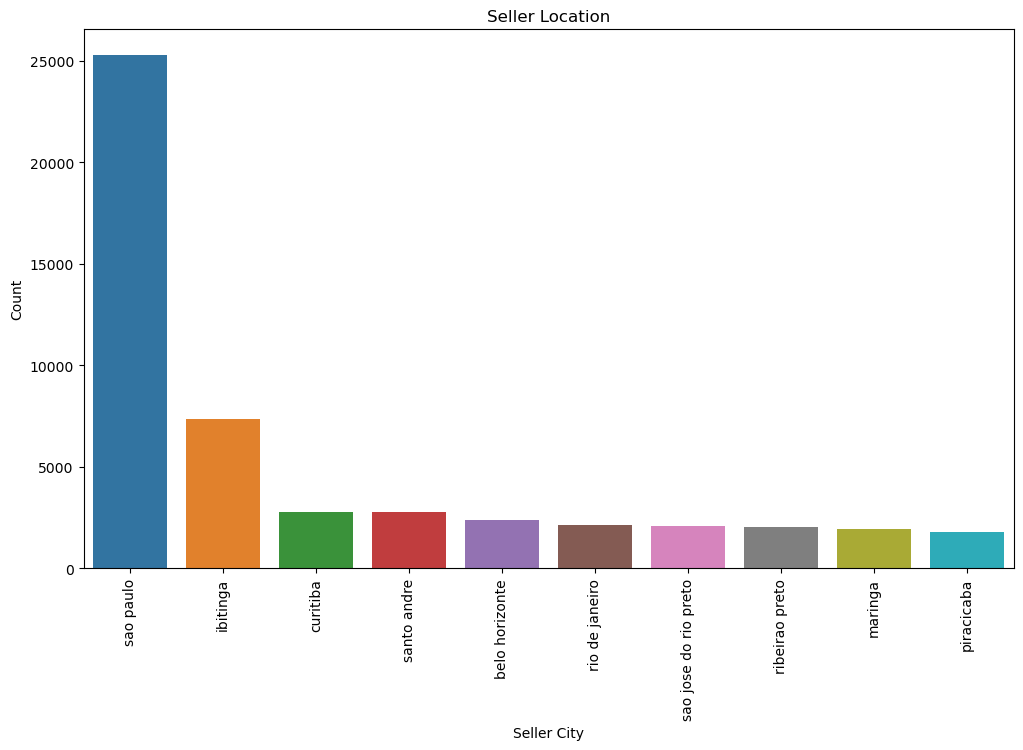

In [53]:
# seller city 
plt.figure(figsize=(12,7))
sns.countplot(data=df_analysis, x="seller_city", 
              order=df_analysis["seller_city"].value_counts().index[0:10])
plt.xlabel('Seller City')
plt.ylabel('Count')
plt.title('Seller Location')
plt.xticks(rotation=90);
# plt.savefig("figure.png");

## 4. Geolocation Analysis

### 4.1. customer location

In [54]:
df_loc_customer = df_geolocation.copy()

In [55]:
df_loc_customer = df_loc_customer.rename({'geolocation_zip_code_prefix': 'customer_zip_code_prefix'}, axis=1)
customer_loc = pd.merge(left = df_customer, right = df_loc_customer, how = 'left', on = 'customer_zip_code_prefix')

In [56]:
customer_location = customer_loc.copy()

In [57]:
customer_location = customer_location.reset_index(drop=True)

In [58]:
customer_location.shape

(15083733, 9)

In [59]:
customer_location = customer_location.sample(frac=0.0001, replace=True, random_state=1)
customer_location.shape

(1508, 9)

In [60]:
#setting center for our map
center = [20.593684,78.96288]

# creating map
map = folium.Map(location = center, zoom_start = 2)

In [61]:
customer_location['geolocation_lat'] = customer_location['geolocation_lat'].fillna(0)
customer_location['geolocation_lng'] = customer_location['geolocation_lng'].fillna(0)

In [62]:
customer_location.shape

(1508, 9)

In [63]:
# loop to fetch data from dataframe
for i, j in customer_location.iterrows():
    location = [j['geolocation_lat'], j['geolocation_lng']]
    folium.Marker(location, popup = f'City:{j["customer_city"]}').add_to(map)

In [64]:
# displaying the map
map

### 4.2. Seller Location

In [65]:
df_loc_seller = df_geolocation.copy()

In [66]:
df_loc_seller = df_loc_seller.rename({'geolocation_zip_code_prefix': 'seller_zip_code_prefix'}, axis=1)
seller_loc = pd.merge(left = df_seller, right = df_loc_seller, how = 'left', on = 'seller_zip_code_prefix')

In [67]:
seller_location = seller_loc.copy()

In [68]:
seller_location = seller_location.reset_index(drop=True)

In [69]:
seller_location.shape

(435094, 8)

In [70]:
seller_location = seller_location.sample(frac=0.0035, replace=True, random_state=1)
seller_location.shape

(1523, 8)

In [71]:
#setting center for our map
center1 = [20.593684,78.96288]

# creating map
map1 = folium.Map(location = center1, zoom_start = 2)

In [72]:
seller_location['geolocation_lat'] = seller_location['geolocation_lat'].fillna(0)
seller_location['geolocation_lng'] = seller_location['geolocation_lng'].fillna(0)

In [73]:
seller_location.shape

(1523, 8)

In [74]:
# loop to fetch data from dataframe
for i, j in seller_location.iterrows():
    location = [j['geolocation_lat'], j['geolocation_lng']]
    folium.Marker(location, popup = f'City:{j["seller_city"]}').add_to(map1)

In [75]:
# displaying the map
map1